In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data_1A.csv to data_1A.csv


# 2-a. EDA

# Identifikasi data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/data_1A.csv')

print(df.info())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3609 non-null   int64 
 1   text        3609 non-null   object
 2   label       3609 non-null   object
dtypes: int64(1), object(2)
memory usage: 84.7+ KB
None
   Unnamed: 0                                               text  \
0           0  Tuberculous peritonitis: a study comparing cir...   
1           1  Clinical and Doppler echocardiographic follow-...   
2           2  Pulmonary embolism presenting as exercise-indu...   
3           3  Pancreatitis. Pancreatitis is a common but rat...   
4           4  Xeroderma pigmentosum: review and report of a ...   

                             label  
0          cardiovascular diseases  
1  general pathological conditions  
2          nervous system diseases  
3          cardiovascular diseases  
4  general pathological conditions  


In [ ]:
df.head()

,Unnamed: 0,text,label
0,0,Tuberculous peritonitis: a study comparing cir...,cardiovascular diseases
1,1,Clinical and Doppler echocardiographic follow-...,general pathological conditions
2,2,Pulmonary embolism presenting as exercise-indu...,nervous system diseases
3,3,Pancreatitis. Pancreatitis is a common but rat...,cardiovascular diseases
4,4,Xeroderma pigmentosum: review and report of a ...,general pathological conditions


# Visualisasi Distribusi penyebaran data

label
general pathological conditions    1172
digestive system diseases           797
nervous system diseases             753
neoplasms                           502
cardiovascular diseases             385
Name: count, dtype: int64


<ipython-input-4-34f9a01676a7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


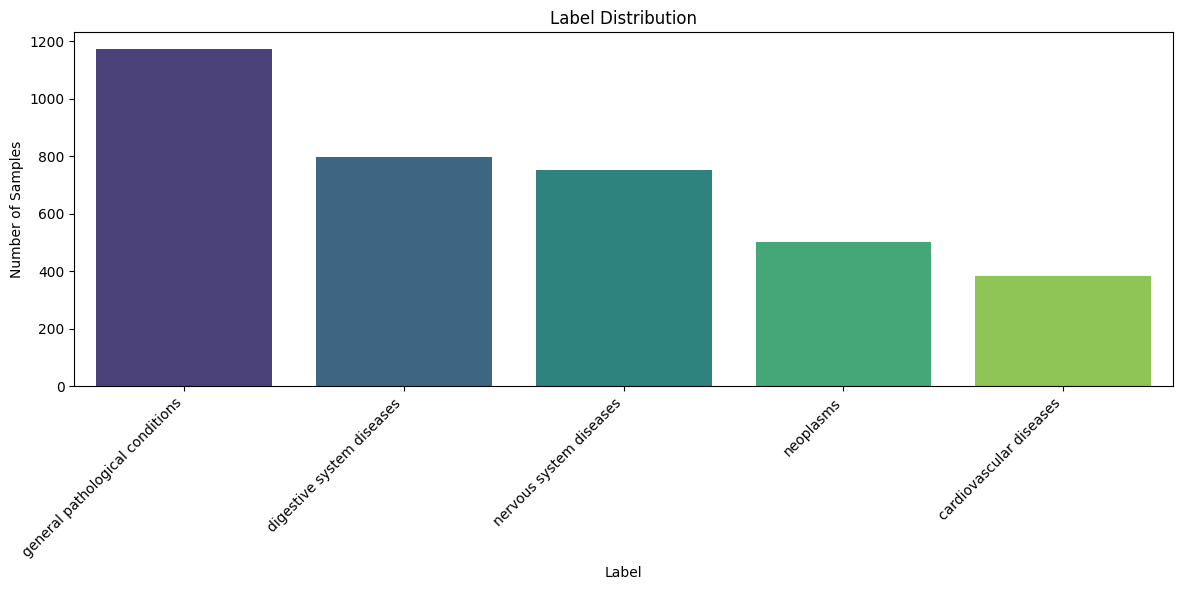

In [ ]:
class_counts = df['label'].value_counts()
print(class_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Label Distribution')
plt.ylabel('Number of Samples')
plt.xlabel('Label')
plt.tight_layout()
plt.show()


# Check word and character statistic

Character stats:
 count    3609.000000
mean     1223.242727
std       515.416106
min       170.000000
25%       839.000000
50%      1200.000000
75%      1575.000000
max      3942.000000
Name: text_length_chars, dtype: float64

Word stats:
 count    3609.000000
mean      178.860349
std        77.982575
min        26.000000
25%       120.000000
50%       174.000000
75%       233.000000
max       596.000000
Name: text_length_words, dtype: float64


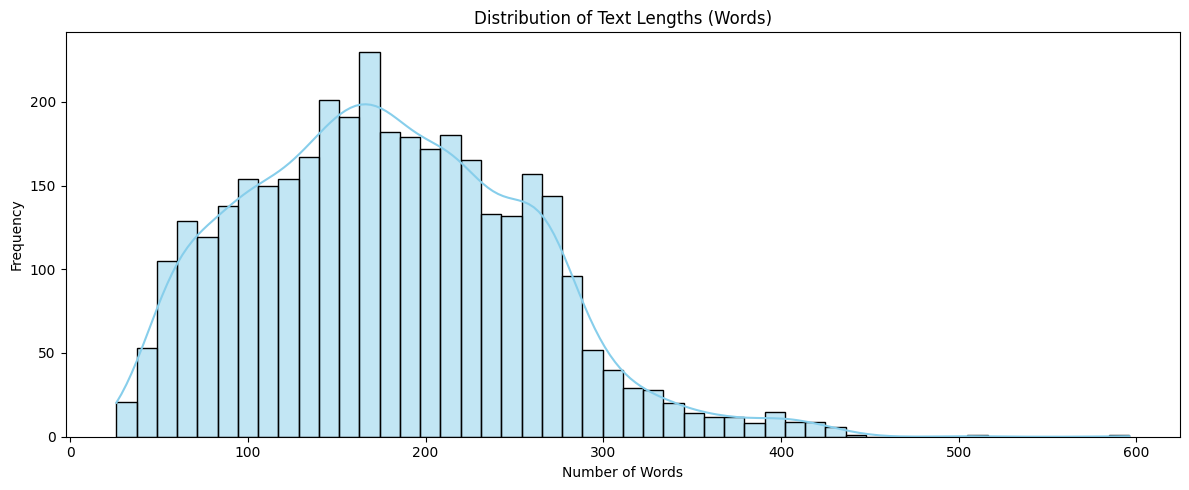

In [ ]:
df['text_length_chars'] = df['text'].apply(len)
df['text_length_words'] = df['text'].apply(lambda x: len(x.split()))

print("Character stats:\n", df['text_length_chars'].describe())
print("\nWord stats:\n", df['text_length_words'].describe())


plt.figure(figsize=(12, 5))
sns.histplot(df['text_length_words'], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Text Lengths (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Check word's frequency

In [ ]:
from collections import Counter
import pandas as pd

all_text = ' '.join(df['text'])

words = all_text.lower().split()
word_counts = Counter(words)

word_freq_df = pd.DataFrame(word_counts.items(), columns=['word', 'count'])
word_freq_df = word_freq_df.sort_values(by='count', ascending=False)
print(word_freq_df.head(20))


         word  count
19        the  30426
18         of  30325
6         and  19985
39         in  19503
85       with  11073
2           a  10757
90         to  10562
54   patients   7027
77        was   6939
154      were   6115
119       for   5467
160        by   3665
47         or   3604
103      that   3566
10         is   3555
80       than   3265
44       from   2601
105        an   2531
141      this   2448
339        at   2440


# 2-b. Pre-Processing Step

# Drop kolom yang tidak informatif

In [ ]:
df = df.drop(columns=["Unnamed: 0"])
print(df.head())

                                                text  \
0  Tuberculous peritonitis: a study comparing cir...   
1  Clinical and Doppler echocardiographic follow-...   
2  Pulmonary embolism presenting as exercise-indu...   
3  Pancreatitis. Pancreatitis is a common but rat...   
4  Xeroderma pigmentosum: review and report of a ...   

                             label  
0          cardiovascular diseases  
1  general pathological conditions  
2          nervous system diseases  
3          cardiovascular diseases  
4  general pathological conditions  


# Text Cleaning & Normalization

In [ ]:
import re

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"[^a-z\s]", "", text)  # Remove punctuation and digits
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra whitespace
    return text

df['clean_text'] = df['text'].apply(clean_text)


# Encode Label

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)


{'cardiovascular diseases': np.int64(0), 'digestive system diseases': np.int64(1), 'general pathological conditions': np.int64(2), 'neoplasms': np.int64(3), 'nervous system diseases': np.int64(4)}


# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X = df['clean_text'].values
y = df['label_encoded'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Tokenization & Sequence Padding


In [ ]:
import spacy
nlp = spacy.load("en_core_sci_md")


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_len = 250
num_classes = 5
embedding_dim = nlp.vocab.vectors_length

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if i >= vocab_size:
        continue
    if word in nlp.vocab:
        embedding_vector = nlp.vocab[word].vector
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# 2-c. BiLSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim,
              input_length=max_len, weights=[embedding_matrix], trainable=False),
    Bidirectional(LSTM(128)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,
    batch_size=32
)

model.save("bilstm_model.h5")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.3123 - loss: 1.5629 - val_accuracy: 0.3255 - val_loss: 1.5406
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.3363 - loss: 1.5376 - val_accuracy: 0.3255 - val_loss: 1.5415
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3227 - loss: 1.5355 - val_accuracy: 0.3241 - val_loss: 1.5486
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3276 - loss: 1.5230 - val_accuracy: 0.3241 - val_loss: 1.5515
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3446 - loss: 1.5113 - val_accuracy: 0.3269 - val_loss: 1.5541
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3356 - loss: 1.5188 - val_accuracy: 0.3186 - val_loss: 1.5530
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3461 - loss: 1.5027 - val_accuracy: 0.3296 - val_loss: 1.5458
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3546 - loss: 1.4968 - val_accuracy: 0.3227 - val_loss: 1.

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("bilstm_model.h5")


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
                                 precision    recall  f1-score   support

        cardiovascular diseases       0.15      0.03      0.04        77
      digestive system diseases       0.26      0.07      0.11       159
general pathological conditions       0.33      0.89      0.48       235
                      neoplasms       0.50      0.01      0.02       100
        nervous system diseases       0.31      0.06      0.10       151

                       accuracy                           0.32       722
                      macro avg       0.31      0.21      0.15       722
                   weighted avg       0.31      0.32      0.21       722



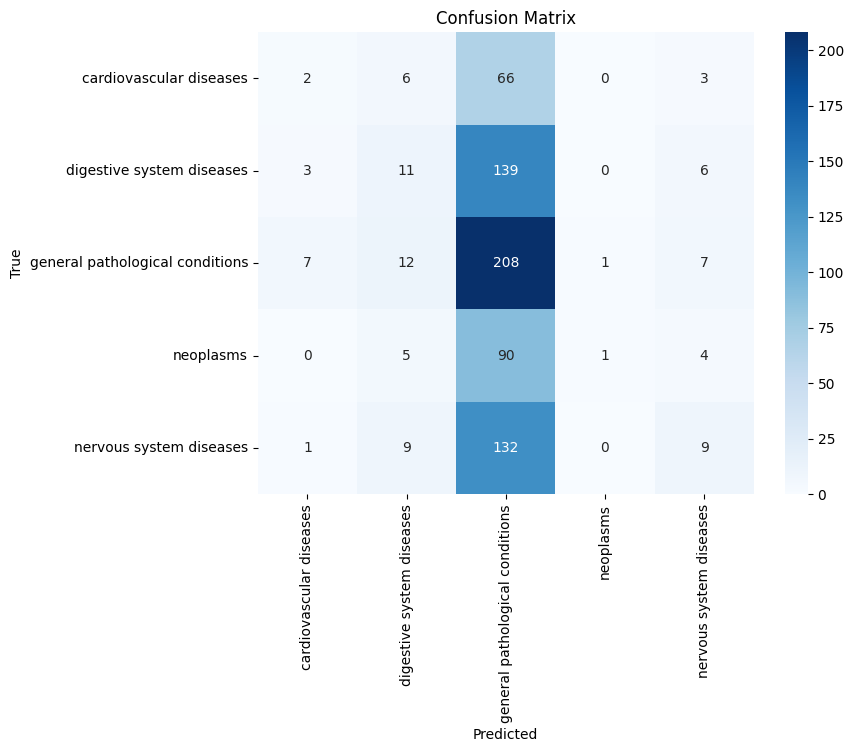

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# Try some hyperparameter Tuning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=250))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Train the BiLSTM

In [ ]:
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,
    batch_size=32,
    verbose=1
)


Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.3110 - loss: 1.5558 - val_accuracy: 0.4945 - val_loss: 1.2931
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5286 - loss: 1.1762 - val_accuracy: 0.5111 - val_loss: 1.2217
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7133 - loss: 0.7808 - val_accuracy: 0.5083 - val_loss: 1.3477
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8184 - loss: 0.5363 - val_accuracy: 0.5097 - val_loss: 1.5973
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9023 - loss: 0.3202 - val_accuracy: 0.4889 - val_loss: 1.6791
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9225 - loss: 0.2559 - val_accuracy: 0.5069 - val_loss: 1.7539
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9233 - loss: 0.2380 - val_accuracy: 0.5042 - val_loss: 1.7488
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9459 - loss: 0.1874 - val_accuracy: 0.4889 - v

# Save the Model

In [ ]:
model.save("bilstm_tuned_model.h5")


# Load the saved model

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("bilstm_tuned_model.h5")


# Print model Performance

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step
                                 precision    recall  f1-score   support

        cardiovascular diseases       0.46      0.36      0.41        77
      digestive system diseases       0.55      0.64      0.59       159
general pathological conditions       0.40      0.48      0.44       235
                      neoplasms       0.44      0.36      0.40       100
        nervous system diseases       0.68      0.50      0.57       151

                       accuracy                           0.49       722
                      macro avg       0.51      0.47      0.48       722
                   weighted avg       0.50      0.49      0.49       722



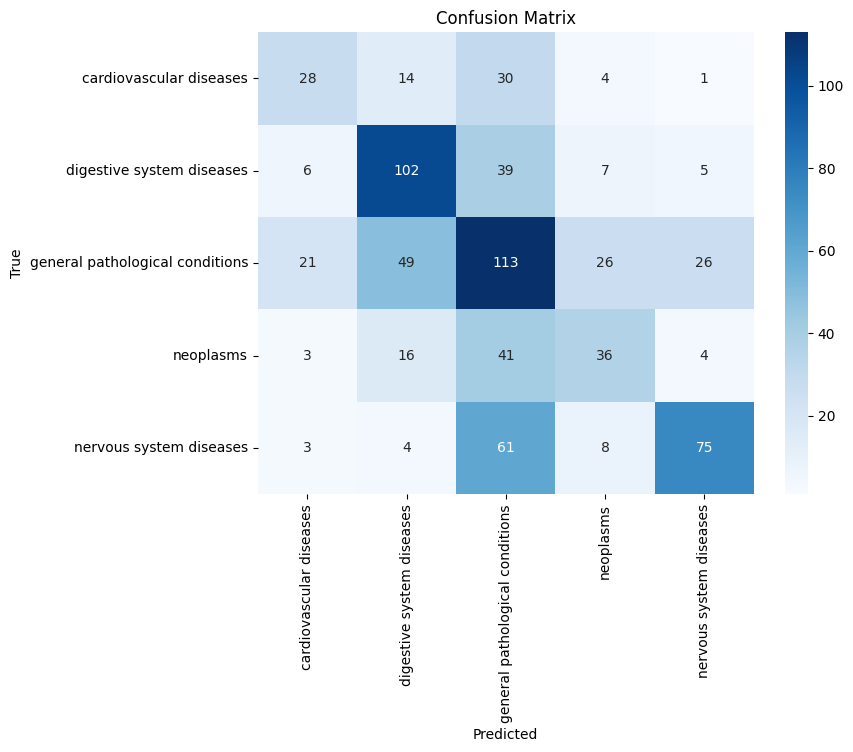

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

# Metrics
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# 2-c. LLM BERT

# declare library and data & preprocessing the data

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv('/content/data_1A.csv')  # adjust path if needed
df = df[['text', 'label']]  # replace with actual column names

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'].values, df['label'].values, test_size=0.2, random_state=42
)


# Tokenization with bert tokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # or 'indobenchmark/indobert-base-p1'

# Tokenization
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
)).batch(16)


# Load and compile Bert model

In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Train the model

In [ ]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs=3)


Epoch 1/3
181/181 [==============================] - 141s 474ms/step - loss: 1.2777 - accuracy: 0.4790 - val_loss: 1.0556 - val_accuracy: 0.5554
Epoch 2/3
181/181 [==============================] - 85s 470ms/step - loss: 0.9431 - accuracy: 0.6266 - val_loss: 1.0483 - val_accuracy: 0.5665
Epoch 3/3
181/181 [==============================] - 86s 472ms/step - loss: 0.7862 - accuracy: 0.6966 - val_loss: 1.0591 - val_accuracy: 0.5873


46/46 [==============================] - 10s 146ms/step
                                 precision    recall  f1-score   support

        cardiovascular diseases       0.58      0.46      0.52        69
      digestive system diseases       0.69      0.88      0.77       185
general pathological conditions       0.47      0.58      0.52       229
                      neoplasms       0.65      0.42      0.51        92
        nervous system diseases       0.67      0.39      0.49       147

                       accuracy                           0.59       722
                      macro avg       0.61      0.55      0.56       722
                   weighted avg       0.60      0.59      0.58       722



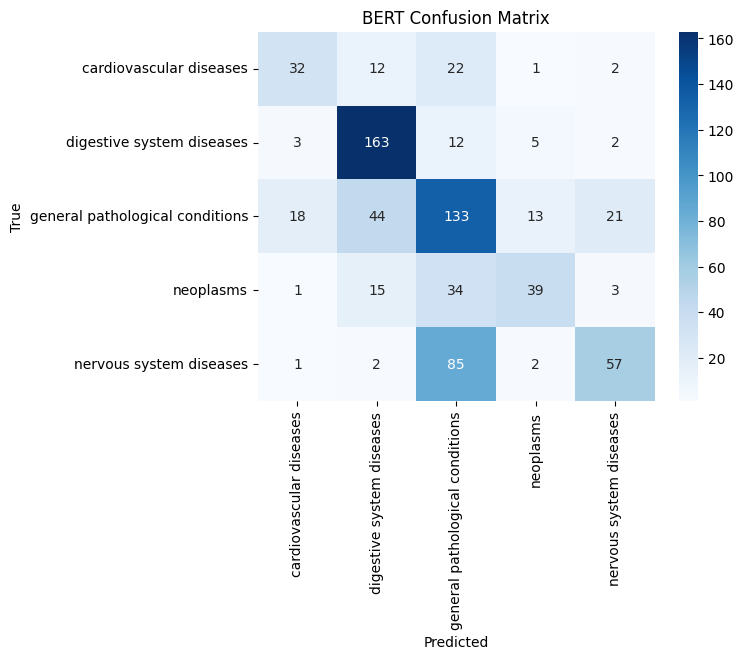

In [ ]:
# Predictions
preds = model.predict(test_dataset).logits
y_pred = np.argmax(preds, axis=1)

# Evaluation
print(classification_report(test_labels, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("BERT Confusion Matrix")
plt.show()


# Save the model

In [ ]:
model.save_pretrained("saved_bert_model")

tokenizer.save_pretrained("saved_bert_model")


('saved_bert_model/tokenizer_config.json',
 'saved_bert_model/special_tokens_map.json',
 'saved_bert_model/vocab.txt',
 'saved_bert_model/added_tokens.json')

# Evaluate the model performance

In [ ]:
from transformers import TFBertForSequenceClassification, BertTokenizer

model = TFBertForSequenceClassification.from_pretrained("saved_bert_model")
tokenizer = BertTokenizer.from_pretrained("saved_bert_model")


Some layers from the model checkpoint at saved_bert_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at saved_bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
preds = model.predict(test_dataset).logits
y_pred = np.argmax(preds, axis=1)


46/46 [==============================] - 12s 151ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(test_labels, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

report = classification_report(test_labels, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:\n")
print(report)



Accuracy: 0.59

Classification Report:

                                 precision    recall  f1-score   support

        cardiovascular diseases       0.58      0.46      0.52        69
      digestive system diseases       0.69      0.88      0.77       185
general pathological conditions       0.47      0.58      0.52       229
                      neoplasms       0.65      0.42      0.51        92
        nervous system diseases       0.67      0.39      0.49       147

                       accuracy                           0.59       722
                      macro avg       0.61      0.55      0.56       722
                   weighted avg       0.60      0.59      0.58       722



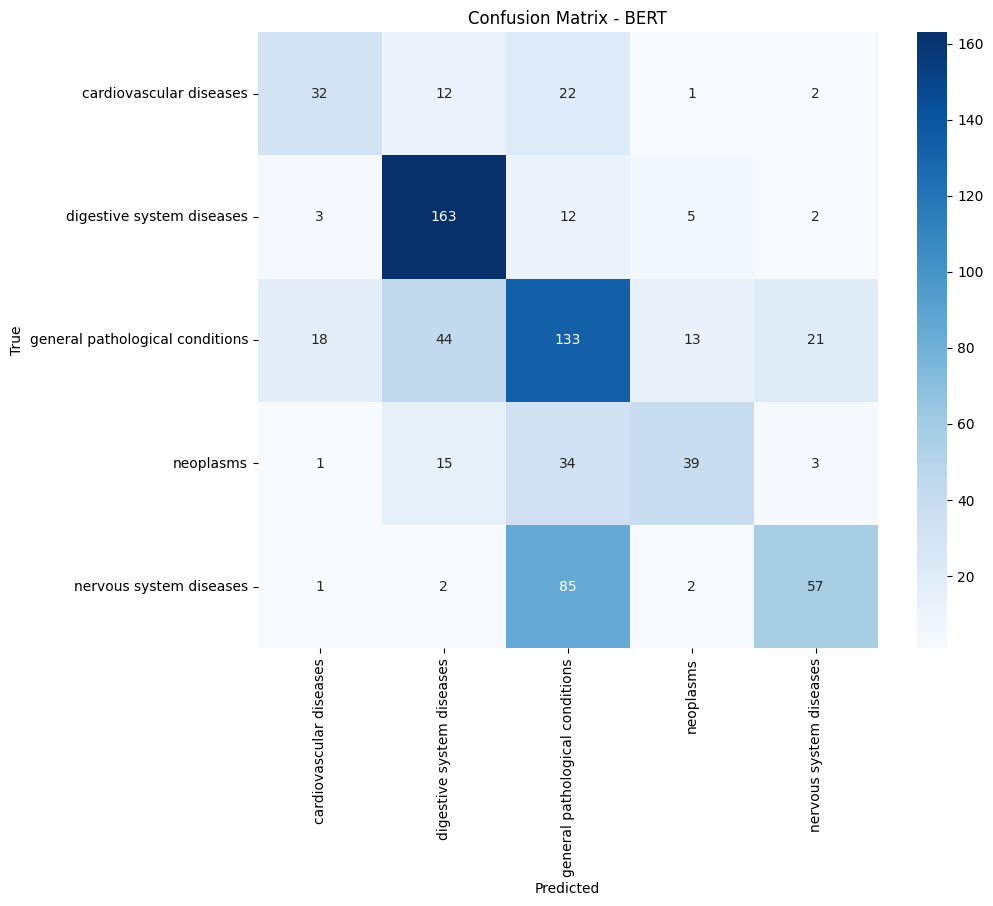

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - BERT')
plt.show()

In [ ]:
from transformers import TFBertForSequenceClassification, BertTokenizer
import tensorflow as tf

# Reload tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize again with final max_length if needed
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels
)).batch(32)

# Initialize model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Compile with best learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train final model
history = model.fit(train_dataset, validation_data=test_dataset, epochs=3)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
91/91 [==============================] - 124s 888ms/step - loss: 1.2949 - accuracy: 0.4693 - val_loss: 1.0398 - val_accuracy: 0.5817
Epoch 2/3
91/91 [==============================] - 78s 855ms/step - loss: 0.9345 - accuracy: 0.6332 - val_loss: 1.0033 - val_accuracy: 0.6094
Epoch 3/3
91/91 [==============================] - 79s 868ms/step - loss: 0.7637 - accuracy: 0.7035 - val_loss: 1.0529 - val_accuracy: 0.6163


In [ ]:
model.save_pretrained("final_bert_model")
tokenizer.save_pretrained("final_bert_model")


('final_bert_model/tokenizer_config.json',
 'final_bert_model/special_tokens_map.json',
 'final_bert_model/vocab.txt',
 'final_bert_model/added_tokens.json')

In [ ]:
  from transformers import TFBertForSequenceClassification, BertTokenizer

model = TFBertForSequenceClassification.from_pretrained("final_bert_model")
tokenizer = BertTokenizer.from_pretrained("final_bert_model")


Some layers from the model checkpoint at final_bert_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at final_bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


23/23 [==============================] - 9s 266ms/step
                                 precision    recall  f1-score   support

        cardiovascular diseases       0.56      0.62      0.59        69
      digestive system diseases       0.71      0.86      0.78       185
general pathological conditions       0.51      0.56      0.53       229
                      neoplasms       0.61      0.49      0.54        92
        nervous system diseases       0.73      0.48      0.58       147

                       accuracy                           0.62       722
                      macro avg       0.62      0.60      0.60       722
                   weighted avg       0.62      0.62      0.61       722



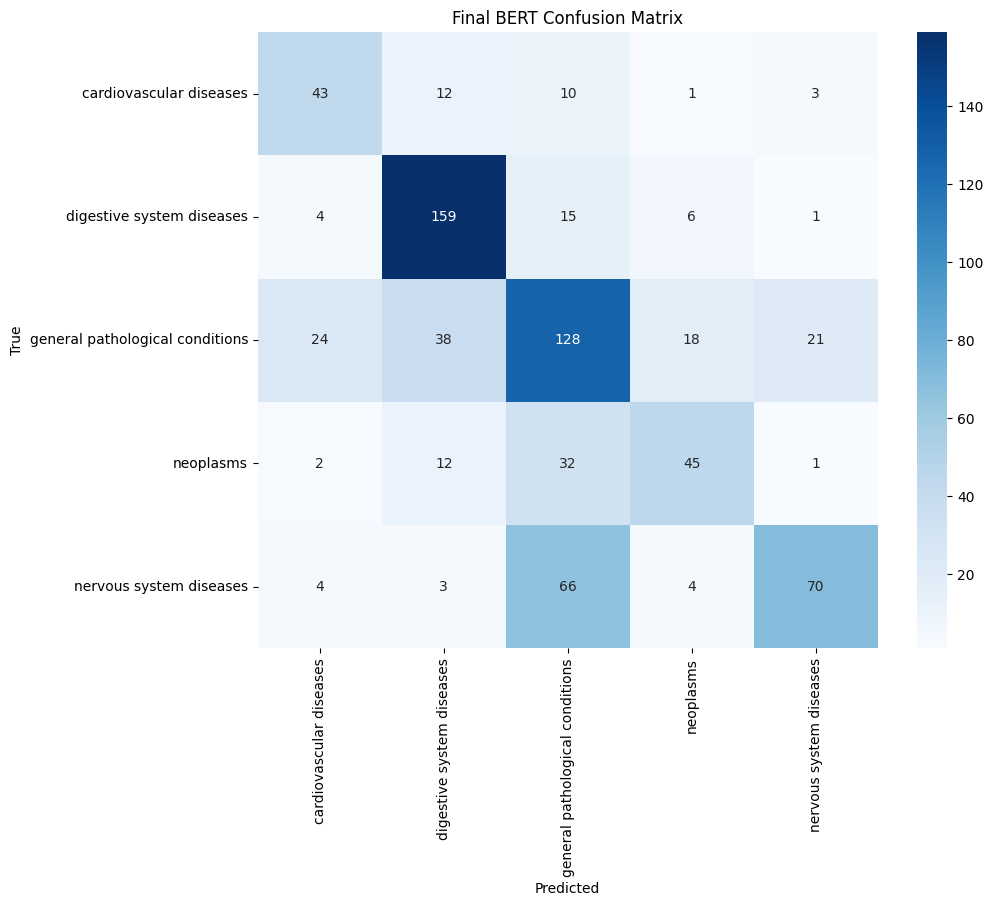

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

preds = model.predict(test_dataset).logits
y_pred = np.argmax(preds, axis=1)

print(classification_report(test_labels, y_pred, target_names=label_encoder.classes_))

cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Final BERT Confusion Matrix')
plt.show()
